In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# ---- Function to estimate pi using Monte Carlo ----
def estimate_pi_mc(N=5000):
    """
    Estimate pi using Monte Carlo sampling in the unit square [-1,1] x [-1,1].
    
    Returns:
        X1, X2: sampled points
        inside: boolean array indicating if point is inside the unit circle
    """
    X1 = 2 * np.random.rand(N) - 1
    X2 = 2 * np.random.rand(N) - 1
    inside = X1**2 + X2**2 <= 1
    return X1, X2, inside

Estimated π: 3.10960


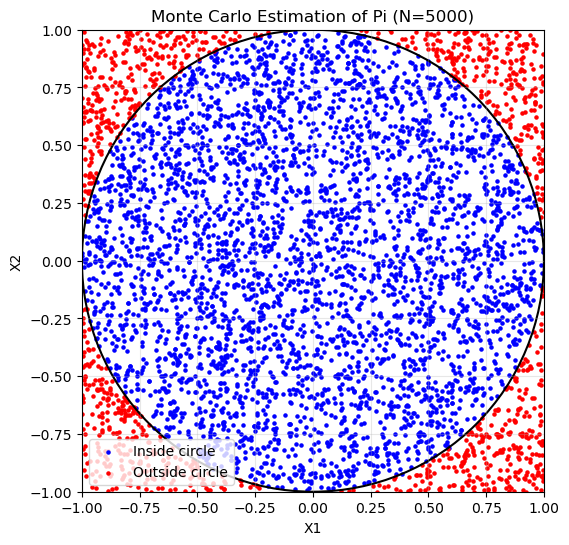

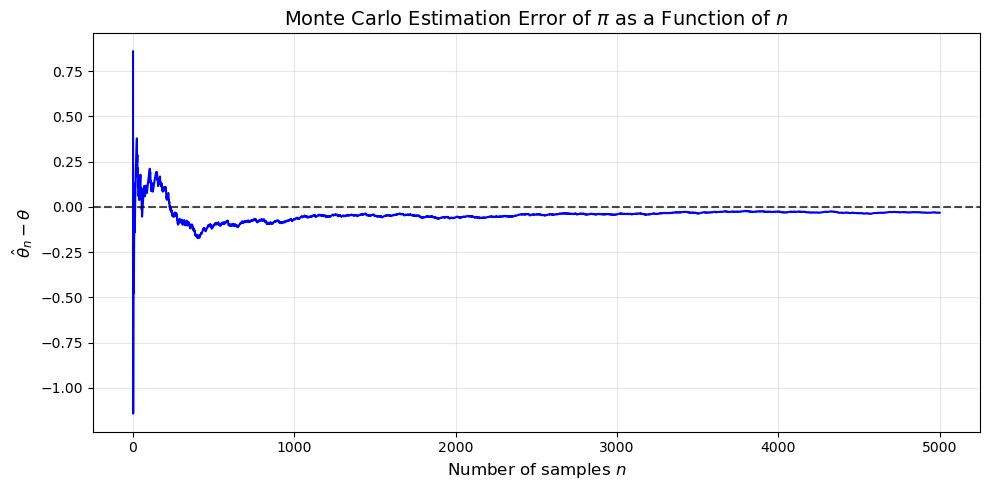

In [9]:
# ---- Parameters ----
N = 5000
theta_true = np.pi

# ---- Generate Monte Carlo points ----
X1, X2, inside = estimate_pi_mc(N=N)

# ---- Monte Carlo estimate ----
pi_estimate = 4 * np.sum(inside) / N
print(f"Estimated π: {pi_estimate:.5f}")

# ---- Plot points in square with circle ----
plt.figure(figsize=(6,6))
plt.scatter(X1[inside], X2[inside], color='blue', s=5, label='Inside circle')
plt.scatter(X1[~inside], X2[~inside], color='red', s=5, label='Outside circle')
circle = plt.Circle((0,0),1, color='black', fill=False, linewidth=1.5)
plt.gca().add_artist(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f"Monte Carlo Estimation of Pi (N={N})")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ---- Compute cumulative estimates and errors ----
cum_inside = np.cumsum(inside)
n_values = np.arange(1, N+1)
theta_hat_n = 4 * cum_inside / n_values
errors = theta_hat_n - theta_true

# ---- Plot estimation error ----
plt.figure(figsize=(10,5))
plt.plot(n_values, errors, color='blue')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.xlabel('Number of samples $n$', fontsize=12)
plt.ylabel('$\hat{\\theta}_n - \\theta$', fontsize=12)
plt.title('Monte Carlo Estimation Error of $\\pi$ as a Function of $n$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()